## New York Taxi Trip Duration - Linear Regression

The data set contains the data regarding several taxi trips and its duration in New York City.

Here is the description of all the variables / features available in the dataset which will help you to perform EDA:

- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
- trip_duration - (target) duration of the trip in seconds

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
df = pd.read_csv("Data/nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null object
dropoff_datetime      729322 non-null object
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [21]:
df.iloc[1]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude                 -73.9883
pickup_latitude                   40.7317
dropoff_longitude                -73.9948
dropoff_latitude                  40.6949
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

In [22]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


### Trip_Duration

- The trip duration varying from 1s to 1939736s~538 hrs. There are definitely some outliers present which must be treated.

In [23]:
print('The value of largest 5 trip duration values are as follows : \n {} '.format(df['trip_duration'].nlargest(5)))
print('The the number of rows with 1 as their trip duration values is {}'.format(len(df[df['trip_duration']==1 ])))

The value of largest 5 trip duration values are as follows : 
 21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64 
The the number of rows with 1 as their trip duration values is 13


* We see that there is 1 very large value and 13 values with 1 second as its duration which is absurd. Hence we are dropping these rows.

In [24]:
df=df[df.trip_duration!=df.trip_duration.max()]
df=df[df.trip_duration!=df.trip_duration.min()]

* We will now create another column with the trip_duration represented in hours. This will be later used for finding out the speed of each trips

In [25]:
df['trip_duration_hour']=df['trip_duration']/3600 

### Passenger Count
We will have a look at the passenger count frequencies

In [26]:
df.passenger_count.value_counts()

1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
9         1
7         1
Name: passenger_count, dtype: int64

* Here the no of records with passenger count 0,9 and 7 are very small compared to the entire data set. Hence, we will drop the values.

In [30]:
df=df[~df["passenger_count"].isin([0,7,9])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729274 entries, 0 to 729321
Data columns (total 12 columns):
id                    729274 non-null object
vendor_id             729274 non-null int64
pickup_datetime       729274 non-null object
dropoff_datetime      729274 non-null object
passenger_count       729274 non-null int64
pickup_longitude      729274 non-null float64
pickup_latitude       729274 non-null float64
dropoff_longitude     729274 non-null float64
dropoff_latitude      729274 non-null float64
store_and_fwd_flag    729274 non-null object
trip_duration         729274 non-null int64
trip_duration_hour    729274 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 72.3+ MB


In [31]:
df.passenger_count.value_counts()

1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [32]:
### Alternatively 

# df=df[df.passenger_count<=6]
# df=df[df.passenger_count!=0]

### Pickup_datetime and Dropoff_datetime

* The 2 columns pickup_datetime and dropoff_datetime are now converted to datetime format which makes analysis of date and time data much more easier.

In [34]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

* we create new columns depicting the month and day of the week the particular trip took place.

In [36]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [37]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hour,pickup_day,dropoff_day,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111,Monday,Monday,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556,Friday,Friday,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167,Sunday,Sunday,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944,Tuesday,Tuesday,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556,Wednesday,Wednesday,2,2


In [38]:
df['pickup_month'].value_counts()

3    128307
4    125627
5    124194
2    119354
6    117404
1    114388
Name: pickup_month, dtype: int64

### Trip Distance, Speed, Time
We are creating a function which returns the distance between a pair of latitudes and longitudes using the haversine distance formula.

In [42]:
#a function is created to calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    
    return R * c

* We will apply this function to each of the rows and create a new feature distance which stores the distance between the pickup and dropoff points in kilometers.

In [43]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

* We will have a look at the distribution of this distance feature against the trip_duration value.

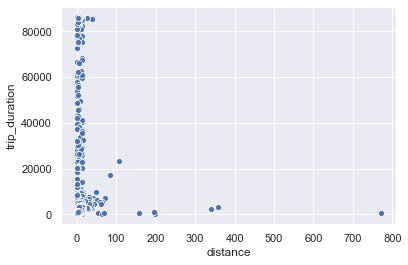

In [44]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

We can see several outliers with values much beyond 200km and many values with trip_distance = 0km. These may be the rows depicting cancelled rides. Lets have a look at how many such rides are there.

In [46]:
print('The no of rows with distance =0 are {}'.format(len(df[df.distance==0])))

The no of rows with distance =0 are 2889


* That’s quite a number! We will not drop these rows. Rather we will replace these datas with the average distance

In [49]:
mean_dist=df['distance'].mean()
df.loc[df['distance']==0,'distance']=mean_dist

* We will now create a new feature called speed. This will help us in identifying data points where time taken and distance covered does not match up. We will also have a look at the distribution of trip speed.

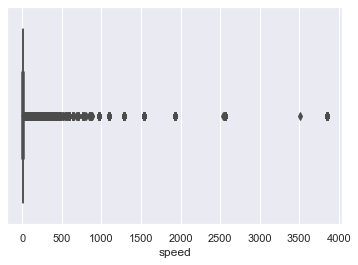

In [51]:
df['speed']=df['distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

Here we see several outliers. The average speed of a taxi in New York City is about 11 km/hour. The data has several data points with a speed way beyond that.
We will now have a look at the distribution of the distance variable against the trip duration in hour feature.

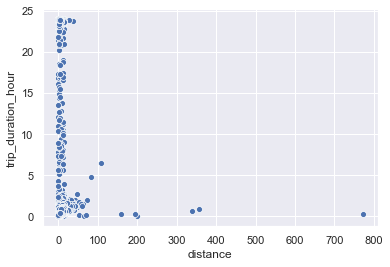

In [53]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

Here we see several data points where the distance is < 20 km and the time taken to be >10 hours. This is very absurd as the avg speed is 11 km/hour.These might be due to extreme road congestion. Lets log transform these columns and have a look at the distribution again.

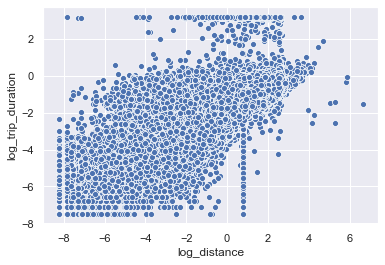

In [55]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

Here we see that the log transformed value of trip duration and distance has a somewhat linear relationship. But still there are some anomalous data points where the duration value is not changing even with the change in distance.
We will thus drop the rows beyond log_trip_duration > 2

In [57]:
df=df[df.log_trip_duration<2]

Since we have added several columns to our data set right now lets have a look at them.

In [58]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_hour', 'pickup_day', 'dropoff_day',
       'pickup_month', 'dropoff_month', 'distance', 'speed', 'log_distance',
       'log_trip_duration'],
      dtype='object')

Now, we won’t use all of them to build our model as this would make the model very complex. We create a new data frame data2 to select only the features which had some effect on the target variable trip_duration.We dropped certain features as they were transformed to other features. We dropped the nominal features as well.
eg: latitude longitudes were converted to distance,pickup and drop off datetime were converted corresponding months and weekdays etc.

In [61]:
data2=df.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
   'dropoff_month','pickup_timezone','dropoff_timezone','speed','log_distance','distance']]

C:\Anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


We will now transform the categorical features from data2 dataframe through one hot encoding.

In [63]:
data2=pd.get_dummies(data2,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone', 'dropoff_timezone'])

Source: 
- www.analyticsvidhya.com
- www.medium.com - Exploratory Data Analysis of New York Taxi Trip Duration Dataset using Python